<a href="https://colab.research.google.com/github/JuanDaGue/Rlativity-/blob/main/Taller_1_Mec%C3%A1nica_Cu%C3%A1ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import *

#Taller N°1 Mecánica Cuántica 

<Center>

##Juan David Guerrero U $\qquad$ CC. 1059705736


Sea una función de onda arbitraria 	(x) definida como
	$$\Psi(x) =\left\{ \begin{array}{lcc}
             x &   si  & 0 \leq x \leq \frac{L}{2} \\
             \\ L-x &  si & \frac{L}{2} \leq x \leq L \\
             \end{array}
   \right.$$

Determine su normalización. Desarrolle dicha función en la base de autofunciones. Dibuje
y compare la función 	$\Psi(x)$ y las sucesivas aproximaciones a la función con $5$, $10$,
$20$ y $40$ términos en el desarrollo. Analice si este estado es estacionario o no, es decir, si
este estado se prepara en $t = 0$, su densidad de probabilidad permanecerá invariante o
no en función del tiempo. Si no, determine cómo es la evolución temporal aprovechando
que sabe expandir la función en términos de las autofunciones exactas.

In [2]:
######### Función Psi ##############
def psi(x):
  y=np.zeros(len(x))
  for i in range(len(x)):
    if x[i]>=0 and x[i]<=L/2:
      y[i]=x[i]
    if x[i]>=L/2 and x[i]<=L:
      y[i]= L-x[i]
  return y/(L**1.5/(2*3**0.5))

In [3]:
############## Datos ######################
z=np.linspace(-100,100,1000)
L=50
N=([1,5,10,20,40])
Col=np.array(['k','darkblue','darkred', 'g','y'])

In [4]:
######### Función Phi_2 ##############
def psi_n(x,n):
  Cn=(4*(6)**(0.5)*np.sin(n*np.pi/2))/((np.pi*n)**2)
  Un=(2/L)**0.5*np.sin(n*np.pi*x/L)
  return Cn*Un
#Datos
######### Función Phi_n interactiva ##############
def Y_n(n):
  Y=0
  for i in range(1,n+1):
    Y=Y+psi_n(z,i)
######### Gráfica ##############
  plt.figure(figsize=(7,4))
  plt.plot(z,Y,'darkred',label='n ='+str(n))
  plt.plot(z,psi(z),'k--', linewidth=4,label=r'$\psi(x)$' )
  plt.title('Partícula en una caja',fontsize=18)
  plt.xlim(0,L)
  plt.ylim(0,max(psi(z))+0.01)
  plt.grid()
  plt.legend()
interact(Y_n,n=N)


interactive(children=(Dropdown(description='n', options=(1, 5, 10, 20, 40), value=1), Output()), _dom_classes=…

<function __main__.Y_n>

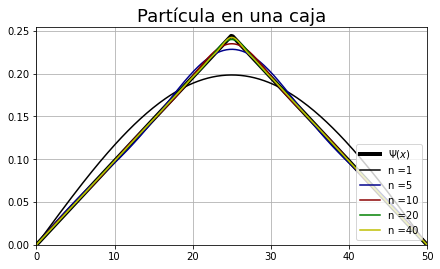

In [5]:

######### Gráfica para diferentes n ##############
plt.figure(figsize=(7,4))
plt.plot(z,psi(z),'k',label=r'$\Psi(x)$', linewidth=4 )
for n in range(len(N)):
   YY=0 
   for i in range(1,N[n]+1):
      YY=YY+psi_n(z,i)
   
   plt.plot(z,YY,color=Col[n],label='n ='+str(N[n]))
   plt.title('Partícula en una caja',fontsize=18)
   plt.xlim(0,L)
   plt.ylim(0,max(psi(z))+0.01)
   plt.grid()
   plt.legend(loc='lower right')


Tome ahora la función $\phi(x)=Nx(L − x)$ (con $N$ el factor de norma) para el mismo
problema. Normalice la función, calcule el valor medio de la energía $E=\langle \phi|ˆH |\phi\rangle$, comparando
con la energía exacta y con la obtenida con la anterior 	$\Psi(x)$ si puede. Determine
nuevamente los coeficientes de expansión en la base de autofunciones y dibuje para $5$,$10$, $20$ y $40$ términos en el desarrollo. Comente sobre la convergencia del desarrollo en
ambos casos.

In [6]:
######### Función Phi ##############
def Phi_(x):
  for i in range(len(x)):
    if x[i]<0 or x[i]>L:
      x[i]=0
  N=(30/L**5)**0.5
  return N*x*(L-x)
######### Función Phi_n ##############
def Phi_n(x,n):
  Cn=4*15**0.5/(np.pi*n)**3*(1-(-1)**n)
  Un=(2/L)**0.5*np.sin(n*np.pi*x/L)
  return Cn*Un
########### Gráfica interactiva de phi ##############
def P_n(n):
  Y=0
  for i in range(1,n+1):
    Y=Y+Phi_n(z,i)
######### Gráfica ##############
  plt.figure(figsize=(7,4))
  plt.plot(z,Y,'*',color='darkred',label='n ='+str(n),linewidth=4 )
  plt.plot(z,Phi_(z),'k',linewidth=2,label=r'$\phi(x)=Nx(L-x)$' )
  plt.title('Partícula en una caja',fontsize=18)
  plt.xlim(0,L)
  plt.ylim(0,max(Phi_(z))+0.01)
  plt.grid()
  plt.legend()
interact(P_n,n=N)



interactive(children=(Dropdown(description='n', options=(1, 5, 10, 20, 40), value=1), Output()), _dom_classes=…

<function __main__.P_n>

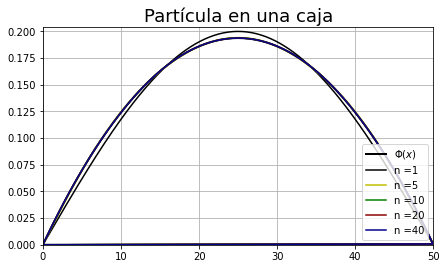

In [7]:

######### Gráfica para diferentes n ##############
plt.figure(figsize=(7,4))
plt.plot(z,Phi_(z),'k',label=r'$\Phi(x)$', linewidth=2 )
for n in range(len(N)):
   YY=0
   
   for i in range(1,N[n]+1):
      YY=YY+Phi_n(z,i)
   
   plt.plot(z,YY,color=Col[-n],label='n ='+str(N[n]))
   plt.title('Partícula en una caja',fontsize=18)
   plt.xlim(0,L)
   plt.ylim(0,max(Phi_(z))+0.01)
   plt.grid()
   plt.legend(loc='lower right')

Considere la familia de funcionales $\Phi(m, x) = Nx^m(L − x)^m$, donde m es un número entero y $N$ es el factor de norma. Determine cuál es el valor óptimo del parámetro $m$ que minimiza el valor medio de la energía. Realice un gráfico de $E(m)$ $vs.$ $m$, indicando cómo compara con el valor exacto para el estado base o fundamental de la caja $(n=1)$.

In [8]:
from scipy.special import gamma, factorial
###### para esta función es nmecesario especificar La cosntante de plank y la masa 
h=1
M=1
""" Función phi(x,m)"""

def PHI_M(x,m):
  N=gamma(4*m+2)*m/(gamma(2*m+1)**2*gamma(4*m))
  Phi_m=(gamma(2*m)**2*m-(m-1)*gamma(2*m-1)*gamma(2*m+1))
  return N*Phi_m 

In [9]:
m=np.linspace(0.5,L/10,30)
#m=np.arange(1,L/5,1)
rr=PHI_M(z,m) 
rr= rr[np.logical_not(np.isnan(rr))]
PHI_M(z,1)
print(r'El volalor de la energia es %f.2 h^2/l^2m'%PHI_M(z,1))


El volalor de la energia es 5.000000.2 h^2/l^2m


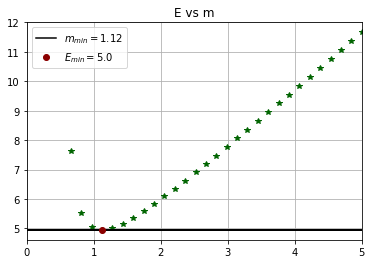

In [10]:
plt.plot(m,rr,'*',color='darkgreen')
plt.plot(z,z*0+rr[4],'k',label=r'$m_{min}=$'+str(np.round(m[4],2)))
plt.plot(1.12,PHI_M(z,m[4]),'o',color='darkred',label=r'$E_{min}=$'+str(np.round(PHI_M(z,m[4]))))
plt.title('E vs m')
plt.xlim(0,5)
plt.grid()
plt.legend()

Proponga una forma funcional simple de una función de onda normalizada de tipo
polinomial $p(x)$ que minimice la energía pero no para el estado fundamental, sino para
el primer estado excitado de la caja $(n=2)$. Justifique su propuesta. Realice el cálculo de la energía para dicho estado propuesto y compruebe si el valor obtenido está por encima o por debajo del valor exacto para $n=2$.

In [11]:
def p(x):
  A=(210/L**3)**0.5
  return (x-3*x**2/L+2*x**3/L**2)*A 
def y2(x,n,L):
  return np.sqrt(2/L)*np.sin((n*np.pi*x)/L)

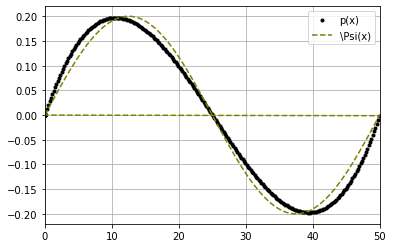

In [12]:
plt.plot(z,p(z),'k.', label=r'p(x)')
plt.plot(z,y2(z,2,L),'--',color='olive',label=r'\Psi(x)')
plt.xlim(0,L)
plt.grid()
plt.legend()

Usando la relación de cierre y la base de autofunciones de una partícula en una caja,
construya sucesivas aproximaciones a la función delta de Dirac $\delta(x−x_0)$ definida dentro
de la caja $x_0 2 [0, L]$.

In [13]:
def delta(x,xp,n):
  Cn=(2/L)**0.5*np.sin(n*np.pi*xp/L)
  Un=(2/L)**0.5*np.sin(n*np.pi*x/L)
  return Cn*Un
  

In [14]:
"""Datos"""
xp=10
def Delta_n(n):
  Y=0
  for i in range(1,n+1):
    Y=Y+delta(z,xp,i)
######### Gráfica ##############
  plt.figure(figsize=(7,4))
  plt.plot(z,Y,'darkred',label='n ='+str(n))
  plt.title('Partícula en una caja',fontsize=18)
  plt.xlim(0,+2*xp)
  plt.grid()
  plt.legend()
interact(Delta_n,n=(1,200))

interactive(children=(IntSlider(value=100, description='n', max=200, min=1), Output()), _dom_classes=('widget-…

<function __main__.Delta_n>

In [15]:
######### Gráfica para diferentes n ##############
def rr(xp):
  plt.figure(figsize=(7,4))
  #plt.plot(z,psi(z),'k',label=r'$\Psi(x)$', linewidth=4 )
  for n in range(len(N)):
    YY=0 
    for i in range(1,N[n]+1):
        YY=YY+delta(z,xp,i)
    
    plt.plot(z,YY,color=Col[n],label='n ='+str(N[n]))
    plt.title('Partícula en una caja',fontsize=18)
    plt.xlim(0,L)
    #plt.ylim(0,max(psi(z))+0.01)
    plt.grid()
    plt.legend(loc='lower right')
interact(rr,xp=(1,50))

interactive(children=(IntSlider(value=25, description='xp', max=50, min=1), Output()), _dom_classes=('widget-i…

<function __main__.rr>